14741
5001
42558
27673
38512
59524
55442
1859
23971
19241


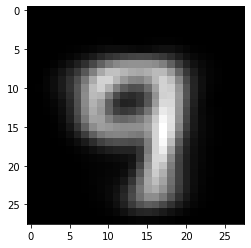

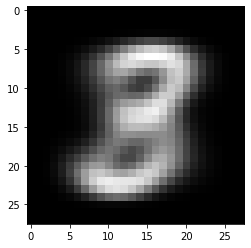

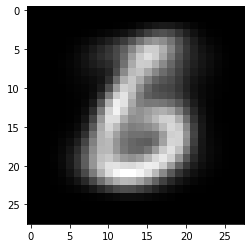

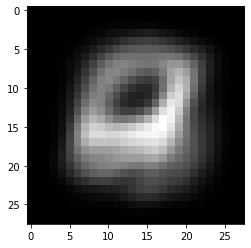

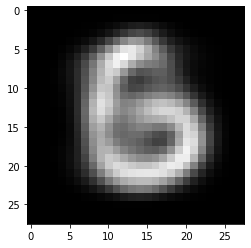

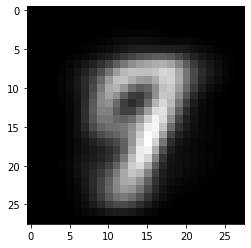

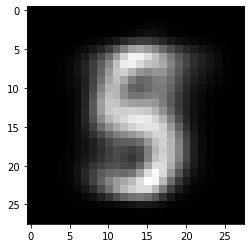

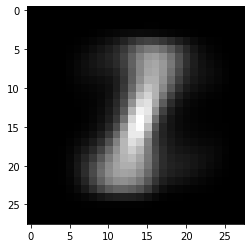

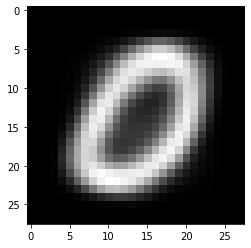

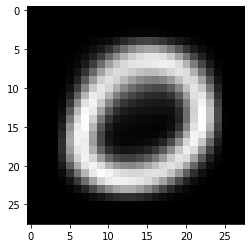

In [38]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mnist import MNIST
def K_means(X,k):
    n=X.shape[0]
    d=X.shape[1]
    Mu=np.zeros((k,d))
    j=0
    for i in range(k):
        j=random.randint(0,n-1)
        print(j)
        Mu[i,:]=X[j,:]
    delta=float("inf")
    
    partitions=[set() for j in range(k)]
    while delta>0:
        newMu=np.zeros((k,d))
        index=0
        for i in range(n):
            minim=float("inf")
            for j in range(k):
                if np.linalg.norm(X[i,:]-Mu[j,:])<minim:
                    index=j
                    minim=np.linalg.norm(X[i,:]-Mu[j,:])
            partitions[index].add(i)
        for j in range(k):
            for m in partitions[j]:
                newMu[j,:]=newMu[j,:]+X[m,:]
            if(len(partitions[j])>0):
                newMu[j,:]=newMu[j,:]/len(partitions[j])
        delta=np.linalg.norm(newMu-Mu)
        Mu=newMu
    return Mu
def main():
    mndata = MNIST("./data/")
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    M=K_means(X_train,10)
    for i in range(M.shape[0]):
        pixels=M[i,:].reshape((28,28))
        plt.imshow(pixels, cmap='gray')
        plt.show()
    

       
if __name__ == "__main__":
    main()
            
        